In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.formula.api import ols
import pandas as pd
from patsy import dmatrices
import scipy.stats as sc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns 
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

sns.set()

# Regression - Engineering

## Exercise 1: Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [2]:
# exercise 1
df = pd.read_csv('../data/tennis.csv')

df.dropna()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
5,1998,"Gstaad, Switzerland",1998-07-06,WS,Outdoor: Clay,Draw: 32,1,702.0,"$5,250",R32,...,4.0,5.0,10.0,38.0,62.0,35.0,74.0,73.0,136.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",Q,...,1.0,6.0,14.0,49.0,87.0,19.0,77.0,68.0,164.0,True
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True


In [3]:
df[['surface']] = df[['surface']].convert_dtypes(convert_string=True)
df[['player1 name']] = df[['player1 name']].convert_dtypes(convert_string=True)

df = df[df["player1 name"]=="Roger Federer"]
df = df[df['player1 total points won'].notnull()]


x = df[['surface']]
y = df[['player1 total points won']]

x.shape #(1027, 1) # We will transform this into an OHE hereafter
y.shape #(1027, 1)

(1027, 1)

In [4]:
# Feature Engineering for CATEGORICAL VARIABLES: OHE
df.surface.unique()

<StringArray>
[  'Indoor: Hard',  'Outdoor: Clay', 'Indoor: Carpet',  'Outdoor: Hard',
 'Outdoor: Grass']
Length: 5, dtype: string

In [5]:
surface_OHE_df = pd.get_dummies(df.surface,drop_first=True)

# Carpet is dropped from the list. So if it's not one off the following categories,
# it'll carpet

In [6]:
# Now let's search for the Linear Regression between the points vs surface_OHE
# Linear regression without Intercept

model = sm.OLS(y,surface_OHE_df).fit()
model.summary()
#y_pred = model.prediction(x)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.865
Model:                                  OLS   Adj. R-squared (uncentered):              0.864
Method:                       Least Squares   F-statistic:                              1638.
Date:                      Thu, 16 Feb 2023   Prob (F-statistic):                        0.00
Time:                              16:16:52   Log-Likelihood:                         -5064.4
No. Observations:                      1027   AIC:                                  1.014e+04
Df Residuals:                          1023   BIC:                                  1.016e+04
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Hard      77.0825      2.412     31.961      0.000      72.350      81.815
Outdoor: Clay     88.0880      2.286     38.540      0.000      83.603      92.573
Outdoor: Grass    98.1667      2.924     33.575      0.000      92.429     103.904
Outdoor: Hard     87.6916      1.624     54.006      0.000      84.505      90.878
==============================================================================
Omnibus:                      214.435   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.809
Skew:                           1.212   Prob(JB):                     6.91e-92
Kurtosis:                       4.983   Cond. No.                         1.80
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value.

A. the AIC/ BIC are >>>10000. An elevated scored is not recommanded for a good model
B. R-Squared fits but the model isn't representative based on the AIC/BIC
C. Coefficients: 
    All the coefficients are positive and
    All the coefficients Pvalues ~0. i.e all the surfaces are contributing to making the score
    
    Indoor: Hard	77.0825
    Outdoor: Clay	88.0880
    Outdoor: Grass	98.1667
    Outdoor: Hard	87.6916
    
    
            
        
    

In [7]:
#2. Answer the following: should your regression include a constant term? 
# Why or why not? 
# How would it change the interpretation of your coefficient and p-value?

In [8]:
surface_OHE_df1 = sm.add_constant(surface_OHE_df)

model1 = sm.OLS(y,surface_OHE_df1).fit(cov_type='HC2')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player1 total points won   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.042
Method:                       Least Squares   F-statistic:                     16.58
Date:                      Thu, 16 Feb 2023   Prob (F-statistic):           3.59e-13
Time:                              16:16:56   Log-Likelihood:                -4849.5
No. Observations:                      1027   AIC:                             9709.
Df Residuals:                          1022   BIC:                             9734.
Df Model:                                 4                                         
Covariance Type:                        HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.411     24.403      0.000      76.543      89.913
Indoor: Hard      -6.1456      3.629     -1.693      0.090     -13.259       0.968
Outdoor: Clay      4.8599      3.990      1.218      0.223      -2.961      12.680
Outdoor: Grass    14.9386      4.492      3.326      0.001       6.135      23.742
Outdoor: Hard      4.4635      3.657      1.221      0.222      -2.703      11.630
==============================================================================
Omnibus:                      147.179   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.816
Skew:                           0.932   Prob(JB):                     1.88e-53
Kurtosis:                       4.484   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

A. The AIC/ BIC result are better with the constant ( althought the R-Square is lower),
based on the explanations provided from the previous lectures and Workshops,
the model with the highest AIC/BIC is better.

B. Yes, we should include the constant.
The Intercept 'absorbs' the missing category 'Indoor: Carpet'. 
So we can actually visualize it now.
Then all other coefficients are based on this INTERCEPT: 
Ex: Const = 83.2281
    Indoor: Hard is Const - 6.1456 = 77.0825
    Outdoor:Clay is Const + 4.8599 = 88.088
    ...
Just as what the previous coefficients were without the INTERCEPT
    
C. The important Coefficients based on the Pvalues<0.05 and std err small, are:
    - Const( 'Indoor: Carpet') => 83.2281 | with Std Dev : 3.411
    - Outdoor Grass            => 14.9386 | with Std Dev : 4.492 (relatively high)
        
    => The most predictable surface for Roger Federer to win more point is on the Carpet
    => The Outdoor Grass overall brings point but hight Std_err shows
        either the sample set is to small for an accurate evaluation 
        or wining points on this surface is never consistent(lots of variations) 
    

In [9]:
#3 - Do a t-test to find that the largest coefficient is statistically significantly
#different from the second largest (hint: you can run a t-test only with mean values and
#standard deviations)

In [10]:
df = df[df['player1 total points won'].notnull()]
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
5,1998,"Gstaad, Switzerland",1998-07-06,WS,Outdoor: Clay,Draw: 32,1,702.0,"$5,250",R32,...,4.0,5.0,10.0,38.0,62.0,35.0,74.0,73.0,136.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",Q,...,1.0,6.0,14.0,49.0,87.0,19.0,77.0,68.0,164.0,True
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True


In [31]:
# NULL Hypothesis: the largest coefficient () is statistically significantly
#different from the second largest
# Largest coef :  ['Indoor: Carpet']
# 2nd largest :   ['Outdoor: Grass']

grp1_df = df[df['surface']=='Indoor: Carpet'][df['player1 name']=='Roger Federer']['player1 total points won']
grp1 = np.array(grp1_df)
grp1 = grp1[~np.isnan(grp1)]
grp1
print(grp1.shape) #(57,)

grp2_df = df[df['surface']=='Outdoor: Grass'][df['player1 name']=='Roger Federer']['player1 total points won']
grp2 = np.array(grp2_df)
grp2 = grp2[~np.isnan(grp2)]
grp2
print(grp2.shape) #(132,)

sc.ttest_ind(grp1, grp2, equal_var = False)

(57,)
(132,)


/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_85353/3032632321.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grp1_df = df[df['surface']=='Indoor: Carpet'][df['player1 name']=='Roger Federer']['player1 total points won']
/var/folders/v_/xxkztlq96zjg39p73r1dvnl00000gn/T/ipykernel_85353/3032632321.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grp2_df = df[df['surface']=='Outdoor: Grass'][df['player1 name']=='Roger Federer']['player1 total points won']


Ttest_indResult(statistic=-3.3258598583561447, pvalue=0.001131717104804236)

T-Score

A large t-score, or t-value, indicates that the groups are different 

while a small t-score indicates that the groups are similar.

pvalue=0.0011 <<< 0.05 meaning we can reject the NULL Hypothesis


In [12]:
#Let's visually observe this:

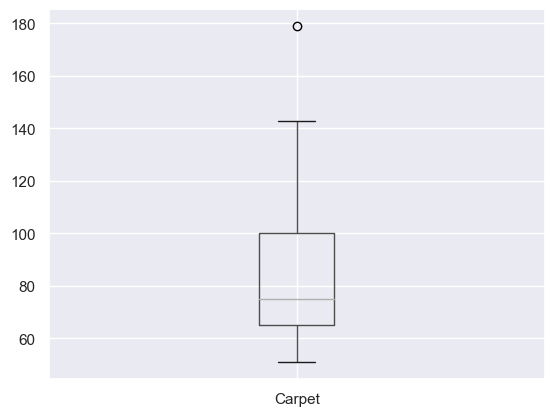

count     57.000000
mean      83.228070
std       25.749492
min       51.000000
25%       65.000000
50%       75.000000
75%      100.000000
max      179.000000
Name: player1 total points won, dtype: float64

In [34]:
df_boxplot1 = pd.DataFrame({'Carpet':grp1})
df_boxplot1.boxplot()
plt.show()
grp1_df.describe()

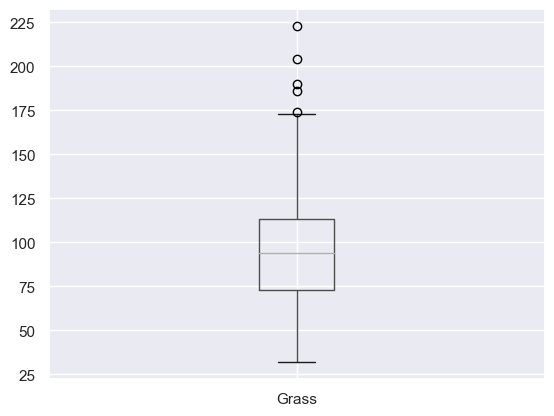

count    132.000000
mean      98.166667
std       33.580294
min       32.000000
25%       73.000000
50%       94.000000
75%      113.250000
max      223.000000
Name: player1 total points won, dtype: float64

In [36]:
df_boxplot2 = pd.DataFrame({'Grass':grp2})
df_boxplot2.boxplot()
#sns.boxplot(data=df_boxplot2)
plt.show()
grp2_df.describe()

In [ ]:
We can see that the median points won on both groups Carpet / Grass:
    on the Carpet = 75 std_dev = 25.74
    on the Grass = 94 std_dev = 33.5
    
The grass looks to have a significant impact on the points earned, 
unlike what the coefficient seems to indicate

## Exercise 2: Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

# exercise 2
1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did


In [ ]:
# best model whether a passenger would survive the titanic disaster 

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?


3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

## Exercise 3: House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [ ]:
# exercise 3
